In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

from order_parameters import *

# Compute some characteristic indices from the spacetime of a ring network

In [2]:
spacetime = np.loadtxt("spacetime_test.txt")
print "space:", spacetime.shape[0], "nodes \ntime:", spacetime.shape[1], "steps"

space: 100 nodes 
time: 1000 steps


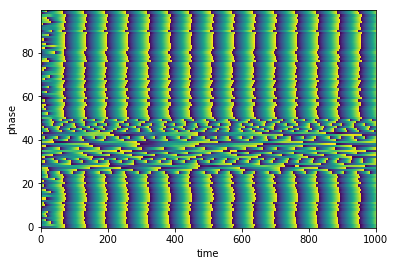

In [3]:
plt.imshow(spacetime, cmap=plt.cm.viridis,
           interpolation="nearest",
           aspect="auto",origin="lower")
plt.xlabel("time")
plt.ylabel("phase")
plt.show()

In [4]:
# Global order parameter (slow method) from t0=200 until the end
t0 = time.time()
op1 = global_order_parameter_spacetime_slow(spacetime[:25,200:]).mean()
op2 = global_order_parameter_spacetime_slow(spacetime[25:50,200:]).mean()
op3 = global_order_parameter_spacetime_slow(spacetime[50:,200:]).mean()
op = global_order_parameter_spacetime_slow(spacetime[:,200:]).mean()
t1 = time.time()
print "order parameter of community 1: {}\n\t\tof community 2: {} \n\t\tof community 3: {}\
\n\t\tand of the whole network: {} ".format(op1,op2,op3,op)
print "time to calculate slow function:{}\n".format(t1-t0) 

order parameter of community 1: 0.952614348581
		of community 2: 0.174274888216 
		of community 3: 0.948823195066
		and of the whole network: 0.722745184726 
time to calculate slow function:0.0183839797974



In [5]:
# Global order parameter (fats method) from t0=200 until the end
t2 = time.time()
op1 = global_order_parameter_spacetime(spacetime[:25,200:]).mean()
op2 = global_order_parameter_spacetime(spacetime[25:50,200:]).mean()
op3 = global_order_parameter_spacetime(spacetime[50:,200:]).mean()
op = global_order_parameter_spacetime(spacetime[:,200:]).mean()
t3 = time.time()
print "order parameter of community 1: {}\n\t\tof community 2: {} \n\t\tof community 3: {}\
\n\t\tand of the whole network: {} ".format(op1,op2,op3,op)
print "time to calculate slow function:{}\n".format(t3-t2)

order parameter of community 1: 0.952614348581
		of community 2: 0.174274888216 
		of community 3: 0.948823195066
		and of the whole network: 0.722745184726 
time to calculate slow function:0.0074679851532



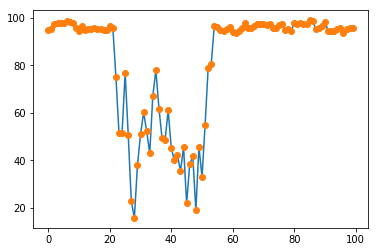

In [6]:
# Local order parameter (one time snapshot at t=100)
lop = local_order_parameter_space(spacetime[:,100],4)
plt.plot(lop,'-')
plt.plot(lop,'o')
plt.show()

In [7]:
# Local order parameter: Calculate from t0=200 until the end
lopsp = local_order_parameter_spacetime(spacetime[:,200:],4)

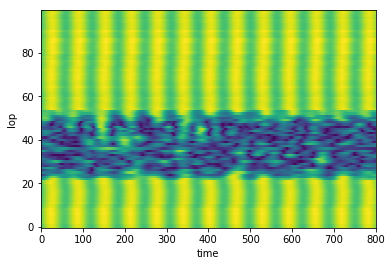

In [8]:
# Local order parameter: Plot
plt.clf()
plt.imshow(lopsp,aspect='auto',origin="lower")
plt.xlabel("time")
plt.ylabel("lop")
plt.show()

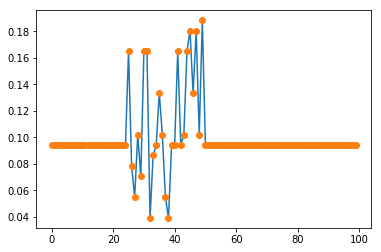

In [9]:
# Mean phase velocity: Calculate from t0=200 until the end
omega = mean_phase_velocity_spacetime(spacetime[:,200:],4)
plt.clf()
plt.plot(omega,'-')
plt.plot(omega,'o')
plt.show()

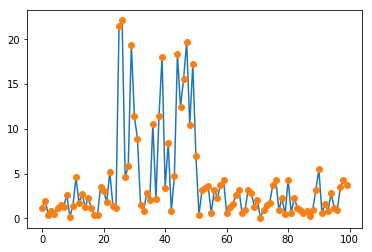

In [10]:
# Local curvature index (one time snapshot at t=100)
local_curv = local_curvature_space(spacetime[:,100],4)
plt.clf()
plt.plot(local_curv,'-')
plt.plot(local_curv,'o')
plt.show()   

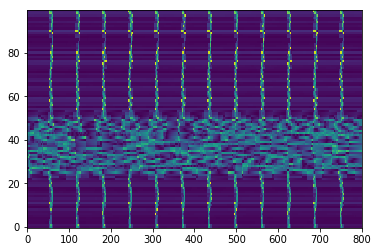

In [11]:
# Local curvature index from t0=200 until the end
lcsp = local_curvature_spacetime(spacetime[:,200:],4)
plt.clf()
plt.imshow(lcsp,aspect='auto',origin="lower")
plt.show()

# The following indices have meaning ONLY for modular networks

In [12]:
# The network was constructed with two communities
membership = np.concatenate((np.zeros(25), np.ones(25), 2*np.ones(50)))
print membership

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


In [13]:
# Chimera-like index
chi = chimera_index(spacetime[:,200:], membership)
print "chimera-like index:",chi

chimera-like index: 0.0223545593622


In [14]:
# Metastability index
lam = metastability_index(spacetime[:,200:], membership)
print "metastability index:" ,lam

metastability index: 0.00316066794135


In [15]:
if chi > lam: print "chimera-like states"
if chi < lam: print "metastable states"

chimera-like states
